# Protecting Sensitive Data Using Encryption

## Data in transit and data at rest

Data protection refers to securing data while in transit (data traveling to and from Amazon S3) and at rest (while stored on disks in Amazon S3 data centers). This section discusses different ways to protect data in transit and data at rest and how to determine which option is best for your business need.

## Data in transit

You can protect data in transit using either HTTPS or client-side encryption. By providing the appropriate level of protection, you protect the confidentiality and integrity of your workload’s data from any third party who might intercept the data while in transit. 

## Ensuring encrypted connections

HTTPS requests use Transport Layer Security (TLS) to encrypt data over the connection. To protect data in transit, use an S3 bucket policy to force the use of HTTPS requests. Doing this ensures the integrity of the data and denies any request that comes in over standard HTTP. To enforce the use of HTTPS on the buckets, use the aws:SecureTransport condition in your Amazon S3 bucket policies.

The following bucket policy allows access to Amazon S3 objects only through HTTPS. To read more about what the elements are doing, choose the markers next to the code line.

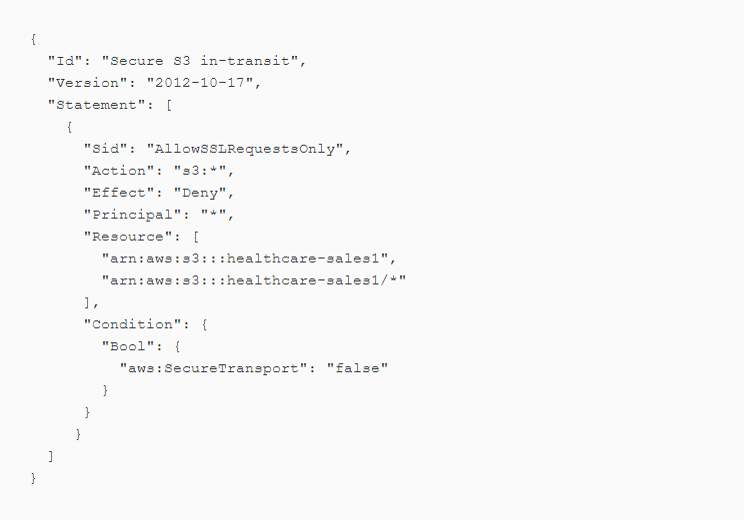

## AWS Config rules

AWS Config is a service that enables you to assess, audit, and evaluate the configurations of your AWS resources. AWS Config continuously monitors and records your AWS resource configurations and allows you to automate the evaluation of recorded configurations against desired configurations. You can use AWS Config rules to implement ongoing detective controls using the s3-bucket-ssl-requests-only AWS Config managed rule. This rule verifies whether your buckets have policies requiring encrypted requests by using the aws:SecureTransport condition. This ensures that your existing buckets are secure and any new buckets that you create have encryption turned on.

For more information on Access Analyzer for S3, review the Auditing Amazon Simple Storage Service (Amazon S3) course in the AWS Training Library.

## Server-side encryption

Server-side encryption is the encryption of data at its destination by the application or service that receives it. For data at rest, Amazon S3 provides you with two options: server-side encryption and client-side encryption. When you use server-side encryption, Amazon S3 encrypts an object before saving it to disk and decrypts it when you download it. As long as you authenticate and have access permissions, there is no difference in how you access encrypted or unencrypted objects. 

For example, when you share an object using a presigned URL, that presigned URL works the same for both encrypted and unencrypted objects. Additionally, when you list objects in your bucket, the list API returns a list of all objects, regardless of their encryption.

## Server-side encryption options

You have three mutually exclusive options, depending on how you choose to manage the encryption keys. 

### SSE-S3
**Server-Side Encryption with Amazon S3-Managed Keys (SSE-S3)**



When you use Server-Side Encryption with Amazon S3-Managed Keys (SSE-S3), each object encrypts with a unique key, which is then encrypted with a primary key. Amazon S3 manages the keys and automatically rotates them. Amazon S3 server-side encryption uses one of the strongest block ciphers available, 256-bit Advanced Encryption Standard (AES-256), to encrypt your data. 



No charges are incurred when using SSE-S3. However, requests to configure and use SSE-S3 incur standard Amazon S3 request charges. 

### SSE-KMS
**Server-Side Encryption with Customer Master Keys (CMKs) Stored in AWS Key Management Service (SSE-KMS)**



A customer master key (CMK) is a logical representation of a master key. The CMK includes metadata, such as the key ID, creation date, description, and key state. The CMK also contains the key material used to encrypt and decrypt data. You can choose a customer managed CMK that you create and manage, or you can choose an AWS managed CMK that Amazon S3 creates in your AWS account and manages for you. Like a customer managed CMK, your AWS managed CMK is unique to your AWS account and Region. Only Amazon S3 has permission to use this CMK on your behalf.  



Benefits of using SSE-KMS

- You manage the rotation of the keys 
- Easier to manage a few primary keys as opposed to billions of data keys
- Centralized access and auditing

- Performs better for large datasets

### SSE-C
**Server-Side Encryption with Customer-Provided Keys (SSE-C)**



With Server-Side Encryption with Customer-Provided Keys (SSE-C), you manage the encryption keys. Amazon S3 manages the encryption, as it writes to disks, and decryption, when you access your objects. With this option, you are responsible for managing and rotating the keys. Amazon S3 data can be decrypted only with these keys. This means that if you lose your keys, even AWS Support cannot help you gain access to your data.


## S3 Bucket Keys for SSE-KMS

Workloads that access millions or billions of objects encrypted with SSE-KMS can generate large volumes of requests to AWS Key Management Service (AWS KMS). When you configure your bucket to use an S3 Bucket Key for SSE-KMS, AWS KMS generates a bucket-level key that is used to create unique data keys for new objects that you add to the bucket. This S3 Bucket Key is used for a time-limited period within Amazon S3, reducing the need for Amazon S3 to make requests to AWS KMS to complete encryption operations. This reduces traffic from S3 to AWS KMS. As a result, you can access AWS KMS encrypted objects in S3 at a fraction of the previous cost.

When you configure an S3 Bucket Key, objects that are already in the bucket do not use the S3 Bucket Key. To configure an S3 Bucket Key for existing objects, use a COPY operation.

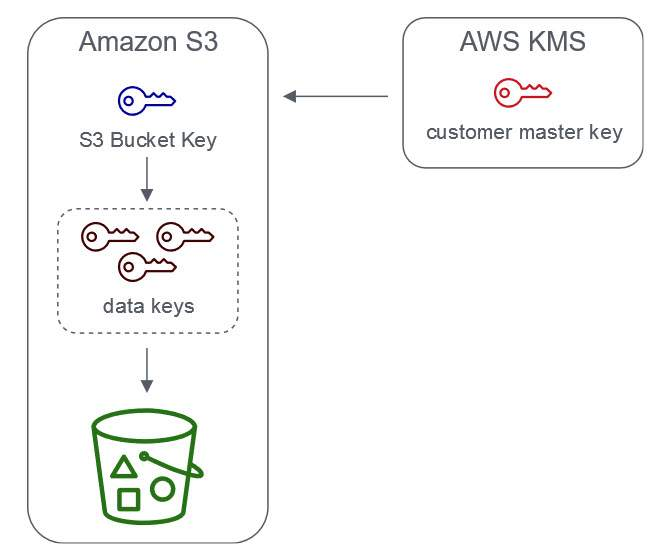


## Using Amazon S3 default encryption

Default encryption is configuring a bucket with the encryption option so that all object in the bucket are encrypted. Implementing default encryption on your buckets is a streamlined process. Once set, no maintenance time is required. New objects added to your buckets are encrypted automatically, making compliance requirements easy. You can choose SSE-S3 or SSE-KMS. If you have existing objects in your bucket and you set the default encryption, the setting does not retroactively encrypt existing objects. To encrypt existing objects, use Amazon S3 Batch Operations.

If you are using a custom AWS KMS key, you must grant users access to use the key. Otherwise, they will not be able to decrypt the objects. In addition, the default encryption on the bucket is used on all objects unless the object PUT request header contains a different encryption method. If the header specifies an encryption method other than the default encryption, it uses the encryption method specified in the header when the object is written to the bucket. You can track default encryption configuration requests for Amazon S3 buckets by doing one of the following:

- Using AWS CloudTrail events
- Creating Amazon CloudWatch Events with S3 bucket-level operations as the event type 

Using encryption is only one of the many layers of security in Amazon S3. Next, you will learn how to connect applications securely to S3 without your data leaving the safety of your VPC.